<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5(%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 로지스틱 회귀분석

In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 데이터 가져오기
body = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adp실기/ADP-study/data/bodyPerformance.csv')
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [7]:
# gender, class 변수 binary로 변환하기
# np.where 활용

# 남자이면 0, 여자이면 1로 변환
body['gender'] = np.where(body['gender']=='M',0,1)
# A반이면 1, 그렇지 않으면 0으로 변환
body['class_1'] = np.where(body['class']=='A',1,0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [10]:
# X, y로 나눈 후
# 7:3으로 데이터 분할하기
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1']))
X = body[feature_columns]
y = body['class_1']

# 데이터 분할하기
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3,
                                                    random_state=1)

# 분할된 데이터 크기 확인하기
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(9375, 11) (4018, 11) (9375,) (4018,)


In [41]:
# 모델 학습시키기
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()
logR.fit(train_X, train_y)

LogisticRegression()

In [42]:
# predic_proba, decision_function 메소드 사용하기
# proba 반환값을 데이터프레임으로 만들기
proba = pd.DataFrame(logR.predict_proba(train_X))
cs = logR.decision_function(train_X)

# 병합
df = pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace=True)
df.reset_index(inplace=True, drop=True)

df

,Not A,A,decision_function
0,1.000000,2.132596e-08,-17.663341
1,1.000000,8.985683e-08,-16.225048
2,1.000000,9.409918e-08,-16.178916
3,1.000000,1.169270e-07,-15.961716
4,1.000000,1.321790e-07,-15.839108
...,...,...,...
9370,0.001490,9.985105e-01,6.507822
9371,0.001444,9.985563e-01,6.539068
9372,0.001216,9.987840e-01,6.710954
9373,0.000448,9.995519e-01,7.710155


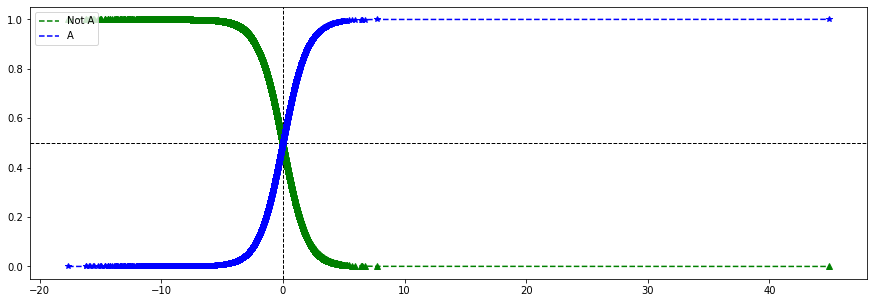

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc='upper left')

plt.show()

In [68]:
# 성능평가 수행해보기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(test_X)

test_cm = confusion_matrix(test_y, pred)
test_acc = accuracy_score(test_y, pred)
test_prc = precision_score(test_y, pred)
test_rcll = recall_score(test_y, pred)
test_f1 = f1_score(test_y, pred)

print(test_cm)
print('\n')
print(f'정확도\t{round((test_acc*100),2)}%')
print(f'정밀도\t{round((test_prc*100),2)}%')
print(f'재현율\t{round((test_rcll*100),2)}%')
print(f'F1\t{round((test_f1*100),2)}%')

[[2759  255]
 [ 345  659]]


정확도	85.07%
정밀도	72.1%
재현율	65.64%
F1	68.72%
